# Load a tracked particle and movie to see if locating workd

### Written by Matan 20230115

In [9]:
#%matplotlib inline
%matplotlib widget


In [10]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact


In [11]:
################functions1##################################################################
def l2n(x):
    return np.array(x)
def parseCircles(circles):
    x = []
    y = []
    r = []
    for i in range(len(circles[0])):
        x.append(circles[0][i,0])
        y.append(circles[0][i,1])
        r.append(circles[0][i,2])
        
    x,y,r = l2n(x), l2n(y),l2n(r)
    return x,y,r

In [12]:
#########################functions2#########################################################
def preProcessFrame(frame):
    #blur and grayout a frame
    
    # Convert to grayscale.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      
    # Convert to HSV and extract the saturation channel
    #sat = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)[:,:,0]

    # median filter
    #median = cv2.medianBlur(gray, 3)
    #gray_blurred = median
    # Blur using 3 * 3 kernel.
    blurSize = 10#5
    gray_blurred = cv2.blur(gray, (blurSize, blurSize))
    
    return gray_blurred

def detectCircles(frame,minRadius,maxRadius,param1=30,param2=25):
    
    minDist = minRadius-1
    dp = 0.5
    # Apply Hough transform on the blurred image.
    circles = cv2.HoughCircles(frame, 
                cv2.HOUGH_GRADIENT,dp, minDist, param1 = param1,
                param2 = param2, minRadius = minRadius, maxRadius = maxRadius)

    return circles
    
def captureFrame(video,frame_id):
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = video.read()
    if ret:
        return frame
    else:
        return ret

def drawCircles(circles,ax ):
    if circles is not None:  
    # Convert the circle parameters a, b and r to integers.
    #detected_circles = np.uint16(np.around(detected_circles))
    #fig, ax = plt.subplots() 
        for pt in circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]
            circle = plt.Circle((a, b), r, color='r',fill=False)
            ax.add_patch(circle)
            #ax.imshow(frame, cmap = 'gray')

def drawCirclesDf(df,ax ):
    for index, row in df.iterrows():
        x,y,r = row.x,row.y,row.r
        circle = plt.Circle((x, y), r, color='r',fill=False)
        ax.add_patch(circle)

def circlesToDataFrame(circles,frameNum):    
    x,y,r = parseCircles(circles)
    data = {'frame':[int(frameNum)]*len(circles),'x':x,'y':y,'r':r}
    dft = pd.DataFrame(data = data)
    
    return dft


def cropImage(img,x0,y0,width,height):
    return img[y0:y0+height,x0:x0+width,:]
'''def cropImage(img,x0,y0,width,height):
    d = len(img.shape)
    if d==2: #grayscale
        return img[y0:y0+height,x0:x0+width]
    elif d==3: #rgb
        return img[y0:y0+height,x0:x0+width,:]
'''

def drawTrajs(df,ax):
    if len(df)>0:
        tp.plot_traj(df,ax=ax)#,label=True)


In [13]:
expSumFileName = 'transportExpSumMaster.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)

In [14]:
expSum.head()

,date,operator,bottype,stars,bots,passiveDiameter[cm],path,locatingFileName,minCircleRadius,maxCircleRadius,...,start_min,end_min,arenaSize[cm],comments,backedup,motorVal,production,linkingFileName,botLocatingFileName,botLinkingFileName
0,20221229,Eden,aligner,NaN,21,7,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4_loc...,22,28,...,0:12,20:18,150,1low bot-replaced,NaN,130,NaN,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4_loc...,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4botL...,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4botL...
1,20221229,Eden,aligner,NaN,21,7,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4_loc...,22,28,...,0:12,20:21,150,1low bot-replaced,NaN,130,NaN,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4_loc...,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4botL...,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4botL...
2,20221229,Eden,aligner,NaN,21,7,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4_loc...,22,28,...,0:07,20:21,150,1 spinning bot-replaced,NaN,130,NaN,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4_loc...,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4botL...,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4botL...
3,20221229,Eden,aligner,NaN,21,7,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4_loc...,22,28,...,0:12,20:18,150,1 spinnig bot plastic replaced,NaN,130,NaN,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4_loc...,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4botL...,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4botL...
4,20221229,Eden,fronter,NaN,21,7,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4_loca...,22,28,...,0:13,20:21,150,NaN,NaN,130,NaN,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4_loca...,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4botLo...,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4botLo...


In [15]:
#########################video_filenames###############################################
#fileName = "D:\Eden\20221208\fronters22\C0486shortLabeled.MP4"

#VERY GOOD
#fileName = 'D:\\Eden\\20221213\\fronters21\\C0492.MP4'
locateFileNameSuffix = '_locatedFull20230320_matan.csv'#suffix of the 
#fileNameVideo = 'D:\\Matan\\20221217\\fronters53passive28cm\\C0505.MP4'#'D:\\Eden\\29_12_22\\frontes_21_7cm\\C0538.MP4'#'D:\\Eden\\29_12_22\\aligners_21_7cm\\C0547.MP4'#'D:\\Eden\\3_1_23\\aligners_21_32cm\\C0552.MP4' #'D:\\Eden\\20221213\\fronters21\\C0492.MP4'#'D:\\Matan\\20221218\\aligners53passive28cm\\C0510.MP4'#'D:\\Eden\\20221213\\aligners21\\C0494.MP4'#'D:\\Eden\\5_1_23\\fronters8passive28cm\\C0562.MP4' #'D:\\Eden\\5_1_23\\fronters8passive28cm\\C0562.MP4'
#fileNameVideo = 'D:\\Eden\\27_12_22\\fronters-12cm\\C0535.MP4'#'test.mp4'#'./C0511coppedTrimmedGray.MP4'
#fileNameLocated = fileNameVideo+locateFileNameSuffix
#arenaSizePixels = 1090 # [pixels]
#arenaSizeCm = 150 # [cm]



In [16]:
cond = (expSum.bottype=='aligner') & (expSum.bots==21) & (expSum['passiveDiameter[cm]']==32)
expSum[cond]

,date,operator,bottype,stars,bots,passiveDiameter[cm],path,locatingFileName,minCircleRadius,maxCircleRadius,...,start_min,end_min,arenaSize[cm],comments,backedup,motorVal,production,linkingFileName,botLocatingFileName,botLinkingFileName
34,20230103,Eden,aligner,NaN,21,32,D:\Eden\3_1_23\aligners_21_32cm\C0552.MP4,D:\Eden\3_1_23\aligners_21_32cm\C0552.MP4_loca...,116,121,...,0:16,20:25,150,NaN,NaN,130,NaN,D:\Eden\3_1_23\aligners_21_32cm\C0552.MP4_loca...,D:\Eden\3_1_23\aligners_21_32cm\C0552.MP4botLo...,D:\Eden\3_1_23\aligners_21_32cm\C0552.MP4botLo...
35,20230103,Eden,aligner,NaN,21,32,D:\Eden\3_1_23\aligners_21_32cm\C0551.MP4,D:\Eden\3_1_23\aligners_21_32cm\C0551.MP4_loca...,116,121,...,0:11,20:23,150,NaN,NaN,130,NaN,D:\Eden\3_1_23\aligners_21_32cm\C0551.MP4_loca...,D:\Eden\3_1_23\aligners_21_32cm\C0551.MP4botLo...,D:\Eden\3_1_23\aligners_21_32cm\C0551.MP4botLo...
36,20230103,Eden,aligner,NaN,21,32,D:\Eden\3_1_23\aligners_21_32cm\C0550.MP4,D:\Eden\3_1_23\aligners_21_32cm\C0550.MP4_loca...,116,121,...,1:48,21:57,150,"1bot-stops in the middle-replaced,1 weird move...",NaN,130,NaN,D:\Eden\3_1_23\aligners_21_32cm\C0550.MP4_loca...,D:\Eden\3_1_23\aligners_21_32cm\C0550.MP4botLo...,D:\Eden\3_1_23\aligners_21_32cm\C0550.MP4botLo...
37,20230103,Eden,aligner,NaN,21,32,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4_loca...,116,121,...,0:09,21:52,150,"1bot-wrong plastic,1 stop and continiue",NaN,130,NaN,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4_loca...,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4botLo...,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4botLo...


### Fetch Experiments details from experiment summary table

In [17]:
expNum = 37

In [18]:
row = expSum.iloc[expNum]

passiveDiameter = row['passiveDiameter[cm]']
fileNameVideo = row.path
fileNameLoc = fileNameVideo + locateFileNameSuffix  #'temporaryLinkingFile.csv'#row.linkingFileName
fileNameLinked = fileNameLoc + '_linked.csv'#"D:\\Matan\\20221216\\fronters21passive32cm\\C0500.MP4botLocatedFull20230315.csv_linked.csv"
arenaSizeCm = row['arenaSize[cm]']
pixelSize  = row.cpp


expSum[expSum.index==expNum]

,date,operator,bottype,stars,bots,passiveDiameter[cm],path,locatingFileName,minCircleRadius,maxCircleRadius,...,start_min,end_min,arenaSize[cm],comments,backedup,motorVal,production,linkingFileName,botLocatingFileName,botLinkingFileName
37,20230103,Eden,aligner,NaN,21,32,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4_loca...,116,121,...,0:09,21:52,150,"1bot-wrong plastic,1 stop and continiue",NaN,130,NaN,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4_loca...,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4botLo...,D:\Eden\3_1_23\aligners_21_32cm\C0549.MP4botLo...


In [19]:
expSum

,date,operator,bottype,stars,bots,passiveDiameter[cm],path,locatingFileName,minCircleRadius,maxCircleRadius,...,start_min,end_min,arenaSize[cm],comments,backedup,motorVal,production,linkingFileName,botLocatingFileName,botLinkingFileName
0,20221229,Eden,aligner,NaN,21,7,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4_loc...,22,28,...,0:12,20:18,150,1low bot-replaced,NaN,130,NaN,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4_loc...,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4botL...,D:\Eden\29_12_22\aligners_21_7cm\C0548.MP4botL...
1,20221229,Eden,aligner,NaN,21,7,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4_loc...,22,28,...,0:12,20:21,150,1low bot-replaced,NaN,130,NaN,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4_loc...,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4botL...,D:\Eden\29_12_22\aligners_21_7cm\C0547.MP4botL...
2,20221229,Eden,aligner,NaN,21,7,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4_loc...,22,28,...,0:07,20:21,150,1 spinning bot-replaced,NaN,130,NaN,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4_loc...,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4botL...,D:\Eden\29_12_22\aligners_21_7cm\C0544.MP4botL...
3,20221229,Eden,aligner,NaN,21,7,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4_loc...,22,28,...,0:12,20:18,150,1 spinnig bot plastic replaced,NaN,130,NaN,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4_loc...,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4botL...,D:\Eden\29_12_22\aligners_21_7cm\C0542.MP4botL...
4,20221229,Eden,fronter,NaN,21,7,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4_loca...,22,28,...,0:13,20:21,150,NaN,NaN,130,NaN,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4_loca...,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4botLo...,D:\Eden\29_12_22\frontes_21_7cm\C0541.MP4botLo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,20221218,Matan,aligner,0.0,53,28,D:\Matan\20221218\aligners53passive28cm\C0513.MP4,D:\Matan\20221218\aligners53passive28cm\C0513....,102,106,...,0:27,20:15,150,NaN,1.0,130,NaN,D:\Matan\20221218\aligners53passive28cm\C0513....,D:\Matan\20221218\aligners53passive28cm\C0513....,D:\Matan\20221218\aligners53passive28cm\C0513....
82,20221217,Matan,fronter,3.0,53,28,D:\Matan\20221217\fronters53passive28cm\C0505.MP4,D:\Matan\20221217\fronters53passive28cm\C0505....,102,106,...,0:28,2:18,150,2 mins to edge,1.0,130,D:\Matan\production\C0505coppedTrimmedGray.MP4,D:\Matan\20221217\fronters53passive28cm\C0505....,D:\Matan\20221217\fronters53passive28cm\C0505....,D:\Matan\20221217\fronters53passive28cm\C0505....
83,20221217,Matan,fronter,1.0,53,28,D:\Matan\20221217\fronters53passive28cm\C0506.MP4,D:\Matan\20221217\fronters53passive28cm\C0506....,102,106,...,0:23,5:15,150,NaN,1.0,130,NaN,D:\Matan\20221217\fronters53passive28cm\C0506....,D:\Matan\20221217\fronters53passive28cm\C0506....,D:\Matan\20221217\fronters53passive28cm\C0506....
84,20221217,Matan,fronter,1.0,53,28,D:\Matan\20221217\fronters53passive28cm\C0507.MP4,D:\Matan\20221217\fronters53passive28cm\C0507....,102,106,...,0:31,6:44,150,NaN,1.0,130,NaN,D:\Matan\20221217\fronters53passive28cm\C0507....,D:\Matan\20221217\fronters53passive28cm\C0507....,D:\Matan\20221217\fronters53passive28cm\C0507....


In [20]:
row = expSum.iloc[expNum]

In [21]:
row.linkingFileName

'D:\\Eden\\3_1_23\\aligners_21_32cm\\C0549.MP4_locatedFull20230223a_test_eden.csv_linked.csv'

In [22]:
#fileNameLinked = "D:\\Eden\\3_1_23\\aligners_21_32cm\\C0549.MP4_locatedFull20230107.csv"
fileNameLinked = 'temporaryLinkingFile.csv'# row.linkingFileName

In [23]:
fileNameLinked

'temporaryLinkingFile.csv'

In [26]:
# Load video file
video = cv2.VideoCapture(fileNameVideo)
# Load locating file
df = pd.read_csv(fileNameLinked)

#Enumerate passive particle as 0
df['particle']=0

#get videos properties
width  = video.get(cv2.CAP_PROP_FRAME_WIDTH )
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT )
fps = video.get(cv2.CAP_PROP_FPS)      # OpenCV v2.x used "CV_CAP_PROP_FPS"
frameCount = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

df = lf.copy()

## Display interactive

In [27]:
plt.ioff()
fig1 = plt.figure()
ax1 = fig1.gca()
#ax.imshow(frame,cmap='Greys')
plt.ion()
#fig1.canvas


In [28]:
########################################widget_cell#####################################################################################
#fig,ax = plt.subplots()
starting_point=100
frame_step=1
maxFrame = frameCount
trajLength = frameCount#10000
frameRange= range(starting_point,maxFrame,frame_step)
@interact(frameNum=frameRange)#df.frame.values)
def drawPassiveParticleOnFrame(frameNum):
    
    dff =df[df.frame==frameNum]
    
    x,y,r = dff.x.values,dff.y.values,dff.r.values
    
    circles = [[x,y,r]]
    img  = captureFrame(video,frameNum)
    imgCropped =cropImage(img,300,0,1200,int(height))
    
    ax1.cla()
    ax1.imshow(imgCropped)
    drawCirclesDf(dff,ax1)
    cond = (frameNum-trajLength<df.frame) &(df.frame<frameNum) 
    drawTrajs(df[cond],ax1)
    #ax.imshow(img, cmap='Greys')
    
HBox([fig1.canvas])

interactive(children=(Dropdown(description='frameNum', options=(100, 101, 102, 103, 104, 105, 106, 107, 108, 1…

In [25]:
df.particle.unique()

array([0], dtype=int64)

In [140]:
df.head()

,Unnamed: 0,frame,x,y,r,particle
0,0,1.0,645.5,547.5,100.3,0
1,1,2.0,643.5,548.5,101.4,0
2,2,3.0,642.5,547.5,100.3,0
3,3,4.0,642.5,546.5,101.4,0
4,4,5.0,644.5,547.5,101.4,0


In [141]:
imsd = tp.imsd(df,0.137,25,max_lagtime=20000)



In [142]:
df.tail()

,Unnamed: 0,frame,x,y,r,particle
32839,32839,32840.0,637.5,556.5,101.4,0
32840,32840,32841.0,638.5,556.5,100.3,0
32841,32841,32842.0,639.5,555.5,100.3,0
32842,32842,32843.0,641.5,556.5,100.3,0
32843,32843,32844.0,637.5,555.5,101.4,0


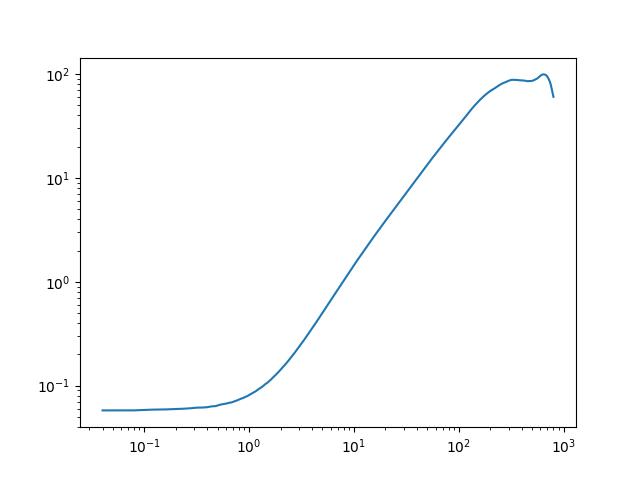

In [143]:
fig,ax = plt.subplots()
ax.loglog(imsd)

In [6]:
df = pd.read_csv('updated_aligner_N021_D032_C0549.MP4_loc.csv',index_col=0)

In [7]:
lf = tp.link(df, search_range=100,memory=25)

Frame 32844: 1 trajectories present.


In [8]:
lf

,frame,x,y,r,particle
0,1,645.5,547.5,100.3,0
1,2,643.5,548.5,101.4,0
2,3,642.5,547.5,100.3,0
3,4,642.5,546.5,101.4,0
4,5,644.5,547.5,101.4,0
...,...,...,...,...,...
32839,32840,637.5,556.5,101.4,0
32840,32841,638.5,556.5,100.3,0
32841,32842,639.5,555.5,100.3,0
32842,32843,641.5,556.5,100.3,0


In [34]:
imsd = tp.imsd(df, mpp = 0.137, fps=25,max_lagtime=20000)

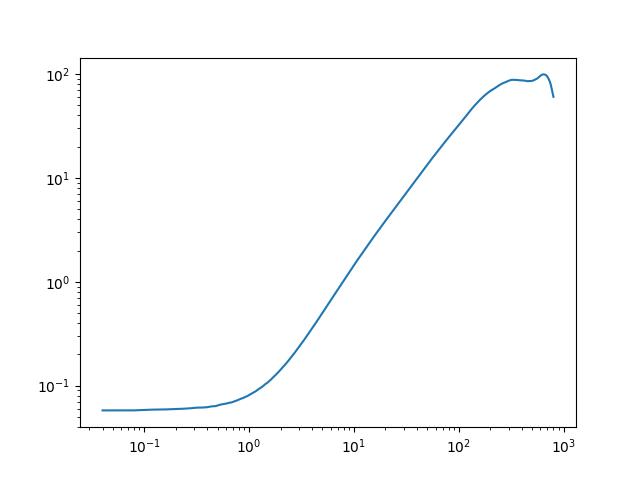

In [35]:
fig,ax = plt.subplots()

ax.loglog(imsd)